В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

# Решение
В качестве распределения рассмотрим распределение Парето со следующей формулой вероятности:

$f(x, b) = \frac{b}{x^{b+1}}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto
https://www.wikiwand.com/en/Pareto_distribution

In [102]:
import scipy.stats as sts
#%matplotlib inline

b = 3
pareto_rv = sts.pareto(b)
# Получим выборку Пуассоновской случайной величины объема n=1000
n = 10000
sample = pareto_rv.rvs(n)

# Построение плотности распределения исходной СВ

In [103]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
# Задаем параметры Пуассоновского распределения. Моделируем значения Пуассоновской СВ. Получаем данные теоретического распределения.

num_p = 100 # number points количество точек по x
ecdf_p_rv = ECDF(sample)
# определяем количыестов отрезков для гистограммы. Чтобы строился интревал для крайнего справа значения.   
bins = [i for i in range(int(min(sample)), int(max(sample)) + 2, 1)]
x = np.linspace(int(min(sample)), int(max(sample)), num_p)
pmf_p_rf = pareto_rv.pdf(x)

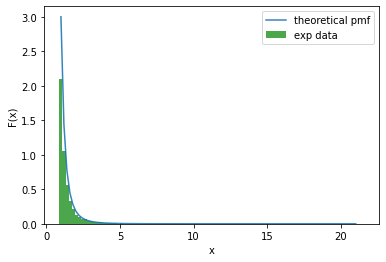

In [104]:
# Построение гистограмм теоретического и выборочноо распределения.
plt.hist(x=sample, bins=num_p, density=True, align='left', color='g', label='exp data', alpha=0.7)
plt.plot(x, pmf_p_rf, label='theoretical pmf', alpha=0.9)
plt.ylabel('F(x)')
plt.xlabel('x')
plt.legend()

# Сравним выборки выборочного среднего с нормальным распределением

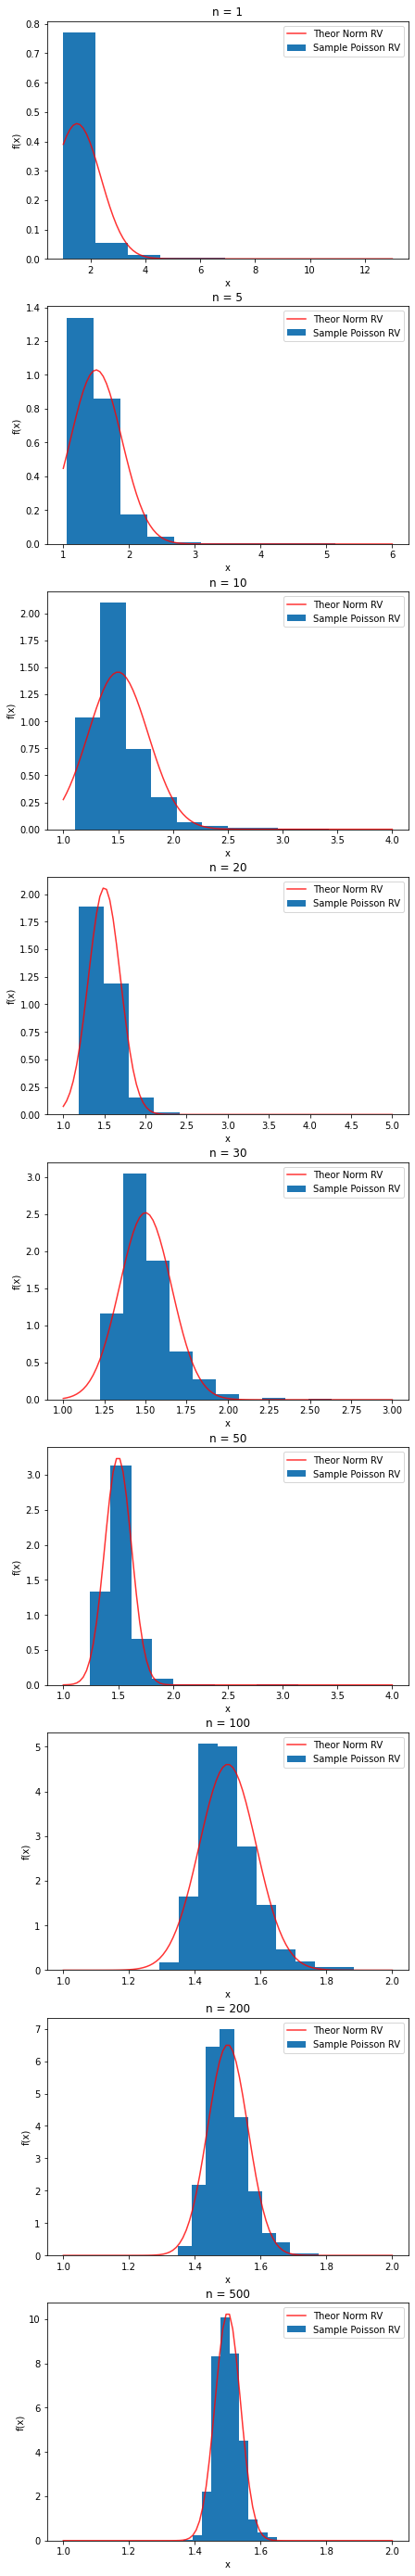

In [107]:
import math
import numpy as np

n_list = [1, 5, 10, 20, 30, 50, 100, 200, 500]
# n_list = [1, 5, 10, 20, 30]
 # Количество элементов в выборочном среднем
m = 1000  # Объем выборки

fig, ax = plt.subplots(nrows = len(n_list), ncols = 1)

num_p = 100 # number of points (количество точек по x)
for ni in range(0, len(n_list)):
    # герерируем массив с выборкой
    n = n_list[ni]
    sample_m = [np.mean(pareto_rv.rvs(n)) for k in range(m)]
    x = np.linspace(int(min(sample_m)), int(max(sample_m))+1, num_p)
    
    # моделируем нормальную СВ
    norm_mu = b / (b - 1)
    norm_var = math.pow(1 / (b - 1), 2) * b / (b - 2) / n
    norm_std = math.sqrt(norm_var)
    norm_rv = sts.norm(loc=norm_mu, scale = norm_std)
    # получаем значение - плотность расределения нормальной СВ
    norm_rv_pdf = norm_rv.pdf(x)
    
    # Построение гистограммы и графиков 
    ax[ni].hist(x=sample_m, density=True, label='Sample Poisson RV', align='mid')
    ax[ni].plot(x, norm_rv_pdf, label='Theor Norm RV', color='r', alpha = 0.8)
    ax[ni].set_title('n = {}'.format(n))
    ax[ni].legend()
    ax[ni].set_xlabel('x')
    ax[ni].set_ylabel('f(x)')
    fig.set_size_inches(7, 50)

## Описание результатов

Было рассмотрено сранвнеие выборочного срденего ненормальной СВ (Парето, PRV)  при различных объемах выборки (1, 5, 10, 20, 30, 50, 100, 500) с нормально распределенной случайной величиной со следующими параметрами:
- математическое ожидание = $E(PRV)$,
- дисперсия = $\frac{D(PRV)}{n}$,

где $PRV$ случайная величина с распределением парето, $E(PRV)$ - математическое ожидание $PRV$, $D(PRV)$ - дисперсия $PRV$. Известно, что $E(PRV)=\frac{b}{b-1}, D(PRV)=(\frac{1}{b -1})^2 \frac{b}{b-2}$. https://www.wikiwand.com/en/Pareto_distribution#/Moments_and_characteristic_function

Видно , что с увеличение объема выборки n выборочного среднего гистограмма выборочного среднего стремится к функции распределени плотности распределения нормальной случайной величины, что соответствует описанию центральной предельной теоремы. 